In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()
flowers = pd.DataFrame(iris.data,columns=iris.feature_names)
print(flowers.keys())
flowers.head()


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


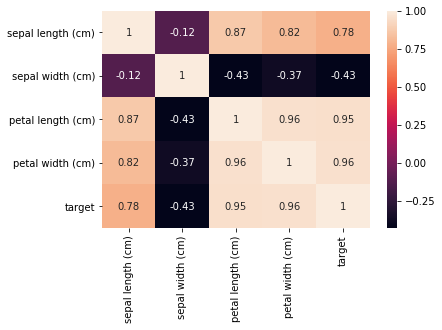

In [4]:
print(iris.target)
#adding to the data frame the target
flowers['target']=iris.target
corr_matrix = flowers.corr().round(2)
sns.heatmap(corr_matrix,annot=True)
# sepal lenght,petal width, petal lenght have a high correlation with the target



Text(0, 0.5, 'petal width in cm')

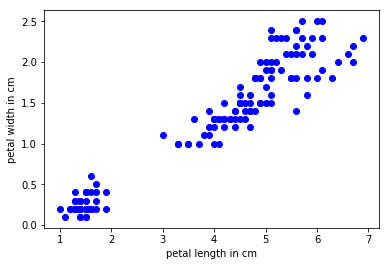

In [5]:
#visualice the data 
x = flowers['petal length (cm)']
y = flowers['petal width (cm)']
plt.scatter(x,y,color='b')
plt.xlabel('petal length in cm')
plt.ylabel('petal width in cm')
#seeing the data
#we can observe that there're 3 different sizes of of flowers according to 
#the petals, the first have small petals, the second medium sized petals and the third have largest petals
#therefore there's a good intuitive classification criterion, it could be seem better with 3 colors instead only blue in the graph

In [10]:
# train the classifier
X = flowers[['sepal length (cm)','petal length (cm)','petal length (cm)']]
Y = flowers['target']
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=0)

from sklearn.tree import DecisionTreeClassifier
a = DecisionTreeClassifier().fit(x_train,y_train)
print("the score of DesicionTreeClassifier is:",a.score(x_test,y_test))
from sklearn.neighbors import KNeighborsClassifier
a = KNeighborsClassifier().fit(x_train,y_train)
print("the score of KNeighborsClassifier is:",a.score(x_test,y_test))
from sklearn.naive_bayes import GaussianNB
a = GaussianNB().fit(x_train,y_train)
print("the score of gaussianNB is:",a.score(x_test,y_test))
from sklearn.svm import SVC
a = SVC(kernel='rbf',gamma = 0.7).fit(x_test,y_test)
print("the score of SVC is:",a.score(x_test,y_test))


the score of DesicionTreeClassifier is: 0.8947368421052632
the score of KNeighborsClassifier is: 0.9473684210526315
the score of gaussianNB is: 0.8947368421052632
the score of SVC is: 0.8947368421052632


the best model was Kneighborsclassifier with a 94% of accuracy :O, let's plot that!


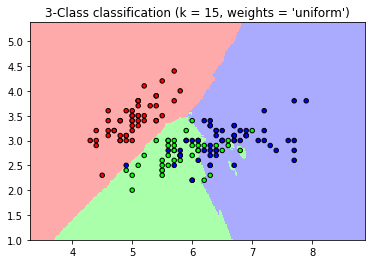

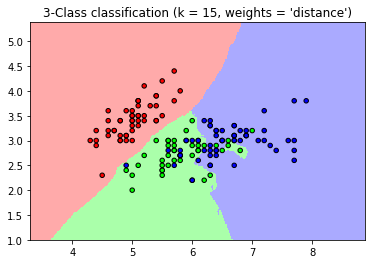

In [15]:
print("the best model was Kneighborsclassifier with a 94% of accuracy :O, let's plot that!")
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
# the code below is from the sklearn KNN documentation: ---> https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()